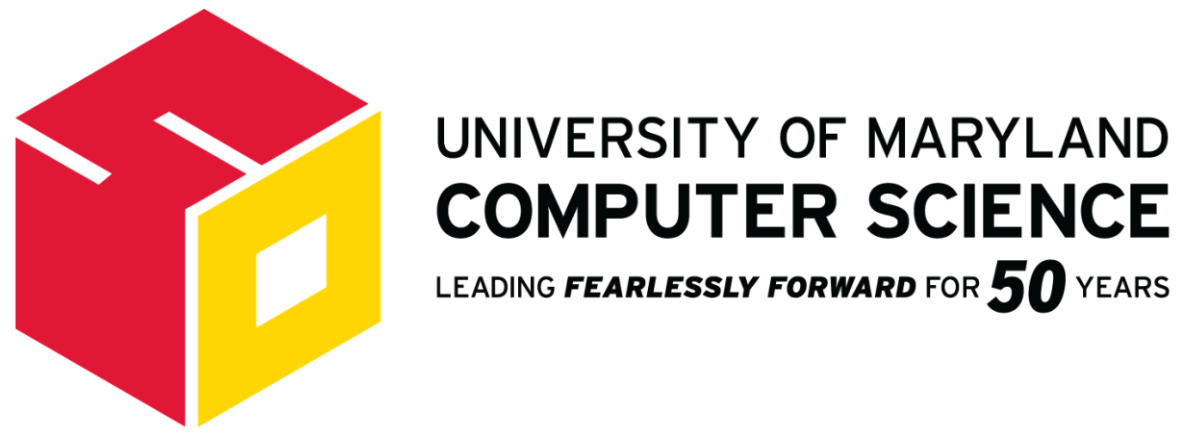

# Summary: Main Points

Over the course of the following assignment you'll walk through a guided tutorial on **Regression** and its uses.

* We'll start with looking at regression on different relations in data (linear, quadratic, etc.).

* Then you'll work on building your own regression tool.

* You'll finish the assignment by tying the ideas of these different relations (linear, quadratic) into neural networks to understand **why** we use neural networks.

### Section 1 : Basic Linear Regression

Let's begin with **some straightforward linear regression** on some basic datasets. Take a look at the data we are using below.

##### Dataset Preparation
Below is the essential code for preparing our dataset for analysis.

Once our dataset is ready, we will proceed to train our linear regression model and evaluate how well it explains the data.

The dataset includes:

- (1) "linear" : A linear dataset
- (2) "convex" : second-order polynomial Dataset
- (3) "trigonometric" : high-order trigonometric Dataset


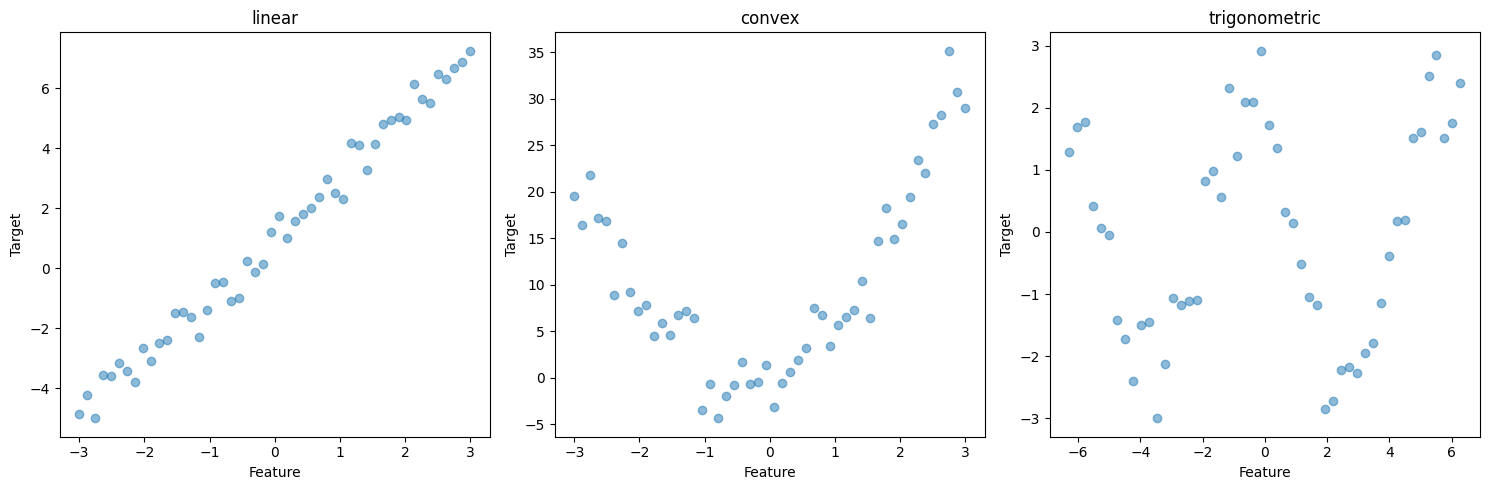

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_polynomial_dataset(weights, n_samples=100, noise_level=0.1):
    """Generate a polynomial dataset."""
    X = np.linspace(-3, 3, n_samples).reshape(-1, 1)
    #what does linspace do?
      #this just generates some data
      #it does so by slicing the interval from [-3, 3], inclusive on both ends, into 50 even intervals by default
      #the argument n_samples defines the number of even sliced we will take out of the indicated range
      #the return is a list where each item is the start point of the slice
    #what does reshape do?
      #the shape of a matrix is how the (numRow, numColumns)
      #when you reshape a matrix you are "modifying" the number of rows and columns
      #so if you say array.reshape(-1, 1) you are saying "idc how many rows but make it one column"
      #if you say array.reshape(-1, 2) you are saying "idc how many rows but make it two columns"]
      #if you say array.reshape(2, -1) you are saying "make it two rows idc how many columns"
      #but how do you know ahead of time it is possible to transfer into a proposed new shape b/c sometimes it fails if the number of items isn't divisible

    y = np.zeros(n_samples)
    #what does np.zeros do?
      #Return a new array of given shape and type, filled with zeros.
      #so in this case we use the default data type, float, and the default shape, a 1d array (numItems, 1)
      #so we get a 1d array of n 0s in float data type

    for i, weight in enumerate(weights):
        y += weight * (X ** i).flatten()
        #what does .flatten do?
          #flatten returns a copy of the array flattened into a 1d array
        #how can we take the power of an array?
          #numpyArray ** 2 essentially applies a map function over each item in the array replacing each item with itself raised to the power of 2
        #how can we multiply an array by a weight?
          #again, applies a map function to multiply each item in the array by the specified amount
    y += np.random.normal(0, noise_level, size=n_samples)  # Adding noise

    return X, y

def generate_trigonometric_dataset(w_c, w_s, n_samples=100, noise_level=0.1):
    """Generate a trigonometric dataset."""
    X = np.linspace(-2 * np.pi, 2 * np.pi, n_samples).reshape(-1, 1)
    y = w_c * np.cos(X).flatten() + w_s * np.sin(X).flatten()
    y += np.random.normal(0, noise_level, size=n_samples)  # Adding noise

    return X, y

datasets = {
    "linear": generate_polynomial_dataset([1, 2], 50, 0.5),
    "convex": generate_polynomial_dataset([1, 2, 3], 50, 2.5),
    "trigonometric": generate_trigonometric_dataset(2, -1, 50, 0.5)
}


# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each dataset
for ax, dataset in zip(axes, datasets.items()):
    title, (X, y) = dataset
    ax.scatter(X, y, alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')

plt.tight_layout()
plt.show()

Above, we visualize these datasets for you to gather some ideas about how they look. Look at the visualizations and consider: What are your thoughts on using linear regression to model the non-linear patterns observed in the convex and trigonometric datasets? Do you believe linear regression is adaptable enough to accurately capture these complex relationships?

##### 1.1. Preparation of Training and Testing Sets

TASK: We will now **divide our three datasets into training and testing sets**.

For this task, you might want utilize the *train_test_split* function from *sklearn*. This step is crucial for preparing our data for the upcoming linear regression modeling, ensuring that we have separate sets for training our models and evaluating their performance.


In [ ]:
from sklearn.model_selection import train_test_split

# Our datasets
X_linear, Y_linear = datasets["linear"]
X_convex, Y_convex = datasets["convex"]
X_tri, Y_tri = datasets["trigonometric"]

random_state = 42
np.random.seed(random_state)

#define dataset splits
X_linear_train, X_linear_test, Y_linear_train, Y_linear_test = train_test_split(X_linear, Y_linear)
X_convex_train, X_convex_test, Y_convex_train, Y_convex_test = train_test_split(X_convex, Y_convex)
X_tri_train, X_tri_test, Y_tri_train, Y_tri_test = train_test_split(X_tri, Y_tri)

Now, let's **visualize our split dataset**. You can just use the below functions to plot them.

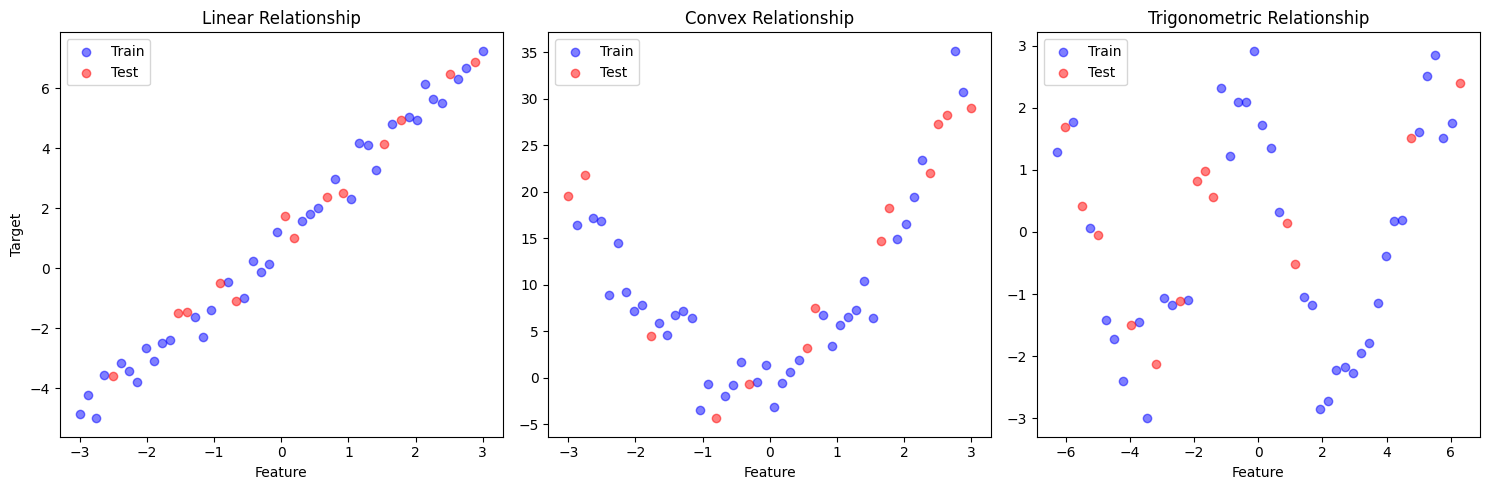

In [ ]:
# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the linear dataset
axes[0].scatter(X_linear_train, Y_linear_train, color='blue', label='Train', alpha=0.5)
axes[0].scatter(X_linear_test, Y_linear_test, color='red', label='Test', alpha=0.5)
axes[0].set_title('Linear Relationship')
axes[0].set_xlabel('Feature')
axes[0].set_ylabel('Target')
axes[0].legend()

# Plot the convex dataset
axes[1].scatter(X_convex_train, Y_convex_train, color='blue', label='Train', alpha=0.5)
axes[1].scatter(X_convex_test, Y_convex_test, color='red', label='Test', alpha=0.5)
axes[1].set_title('Convex Relationship')
axes[1].set_xlabel('Feature')
axes[1].legend()

# Plot the trigonometric dataset
axes[2].scatter(X_tri_train, Y_tri_train, color='blue', label='Train', alpha=0.5)
axes[2].scatter(X_tri_test, Y_tri_test, color='red', label='Test', alpha=0.5)
axes[2].set_title('Trigonometric Relationship')
axes[2].set_xlabel('Feature')
axes[2].legend()

plt.tight_layout()
plt.show()

##### 1.2. Linear Regression: Fit a line for the given dataset

TASK: **Fit a line for each of the 3 datasets!**

*Instructions:* You must fit on the training data and then do predictions for both the training and test sets. Use the training prediction for plotting, and the test prediction for evaluation.

*Hint: You can use LinearRegssion from sklearn.linear_model*

In [ ]:
# Re-import the necessary module for LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#train models 
linearModel = LinearRegression()
linearModel.fit(X_linear_train, Y_linear_train)

convexModel = LinearRegression()
convexModel.fit(X_convex_train, Y_convex_train)

triModel = LinearRegression()
triModel.fit(X_tri_train, Y_tri_train)



#predict outputs for train data
Y_linear_train_pred = linearModel.predict(X_linear_train)
Y_convex_train_pred = convexModel.predict(X_convex_train)
Y_tri_train_pred = triModel.predict(X_tri_train)

#predict outputs for test data
Y_linear_test_pred = linearModel.predict(X_linear_test)
Y_convex_test_pred = convexModel.predict(X_convex_test)
Y_tri_test_pred = triModel.predict(X_tri_test)


Plots below! We'll use the test predictions later.

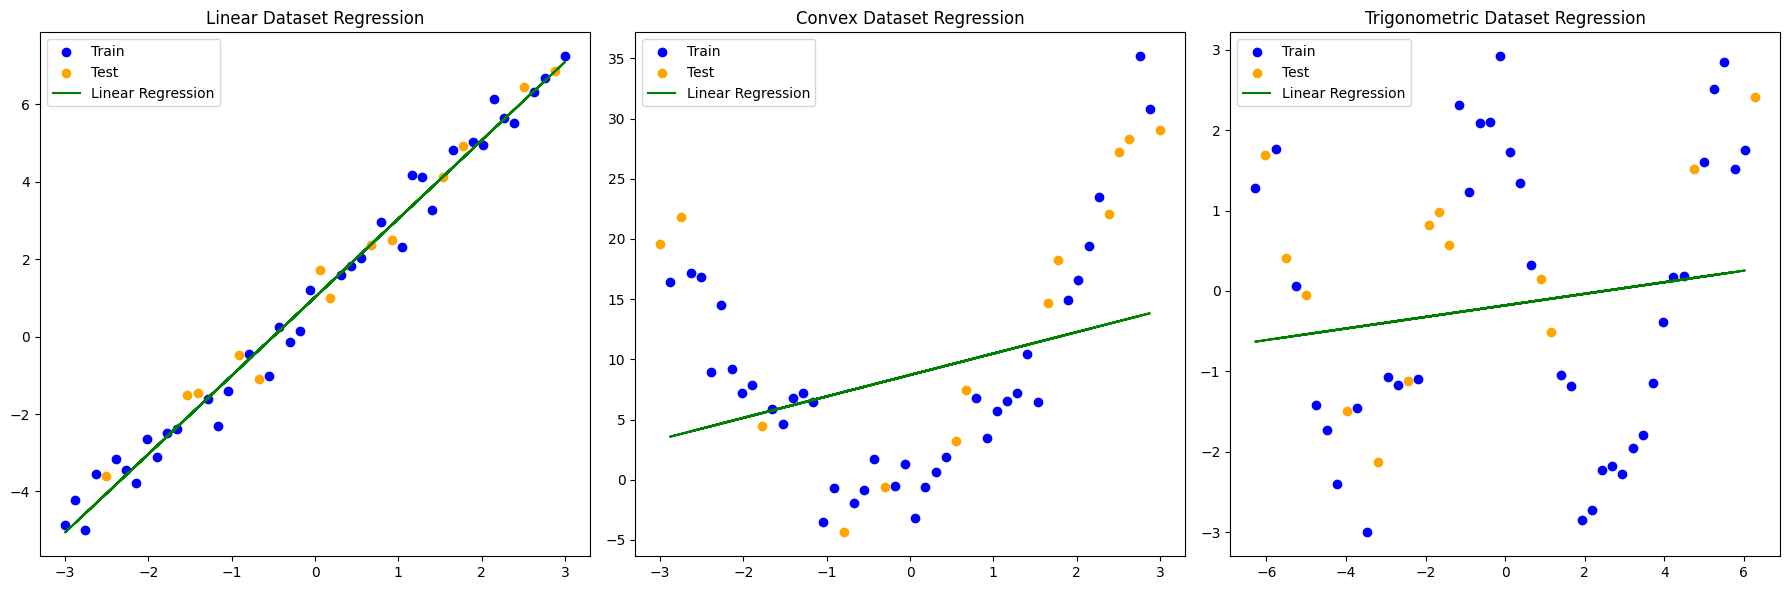

In [ ]:
# Plot the results along with the regression lines for each dataset
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Linear dataset and model
axes[0].scatter(X_linear_train, Y_linear_train, color='blue', label='Train')
axes[0].scatter(X_linear_test, Y_linear_test, color='orange', label='Test')
axes[0].plot(X_linear_train, Y_linear_train_pred, color='green', label='Linear Regression')
axes[0].set_title('Linear Dataset Regression')
axes[0].legend()

# Convex dataset and model
axes[1].scatter(X_convex_train, Y_convex_train, color='blue', label='Train')
axes[1].scatter(X_convex_test, Y_convex_test, color='orange', label='Test')
axes[1].plot(X_convex_train, Y_convex_train_pred, color='green', label='Linear Regression')
axes[1].set_title('Convex Dataset Regression')
axes[1].legend()

# Trigonometric dataset and model
axes[2].scatter(X_tri_train, Y_tri_train, color='blue', label='Train')
axes[2].scatter(X_tri_test, Y_tri_test, color='orange', label='Test')
axes[2].plot(X_tri_train, Y_tri_train_pred, color='green', label='Linear Regression')
axes[2].set_title('Trigonometric Dataset Regression')
axes[2].legend()

plt.tight_layout()
plt.show()

##### 1.3. Linear Model Evaluation
TASK: Calculate the Mean Squared Error (MSE) and $R^2$ coefficient for each training and test spllit.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R^2 for the linear dataset
mse_linear_train = mean_squared_error(y_true=Y_linear_train, y_pred= Y_linear_train_pred)
mse_linear_test = mean_squared_error(y_true = Y_linear_test, y_pred= Y_linear_test_pred)
r2_linear_train = r2_score(y_true= Y_linear_train, y_pred= Y_linear_train_pred)
r2_linear_test = r2_score(y_true= Y_linear_test, y_pred= Y_linear_test_pred)

# Calculate MSE and R^2 for the convex dataset
mse_convex_train = mean_squared_error(y_true= Y_convex_train, y_pred=Y_convex_train_pred)
mse_convex_test = mean_squared_error(y_true=Y_convex_test, y_pred=Y_convex_test_pred)
r2_convex_train = r2_score(y_true=Y_convex_train, y_pred=Y_convex_train_pred)
r2_convex_test = r2_score(y_true=Y_convex_test, y_pred=Y_convex_test_pred)

# Calculate MSE and R^2 for the trigonometric dataset
mse_tri_train = mean_squared_error(y_true= Y_tri_train, y_pred= Y_tri_train_pred)
mse_tri_test = mean_squared_error(y_true= Y_tri_test, y_pred= Y_tri_test_pred)
r2_tri_train = r2_score(y_true= Y_tri_train, y_pred= Y_tri_train_pred)
r2_tri_test = r2_score(y_true= Y_tri_test, y_pred= Y_tri_test_pred)

In [ ]:
# Organize the results into a structured format
results = {
    "Linear": {
        "MSE Train": mse_linear_train,
        "MSE Test": mse_linear_test,
        "R2 Train": r2_linear_train,
        "R2 Test": r2_linear_test
    },
    "Convex": {
        "MSE Train": mse_convex_train,
        "MSE Test": mse_convex_test,
        "R2 Train": r2_convex_train,
        "R2 Test": r2_convex_test
    },
    "Trigonometric": {
        "MSE Train": mse_tri_train,
        "MSE Test": mse_tri_test,
        "R2 Train": r2_tri_train,
        "R2 Test": r2_tri_test
    }
}

# Print the results
for dataset, metrics in results.items():
    print(f"{dataset} Dataset:")
    print(f"  MSE Train: {metrics['MSE Train']:.4f}")
    print(f"  MSE Test: {metrics['MSE Test']:.4f}")
    print(f"  R2 Train: {metrics['R2 Train']:.4f}")
    print(f"  R2 Test: {metrics['R2 Test']:.4f}")
    print()  # Add a blank line for better readability

Linear Dataset:
  MSE Train: 0.2063
  MSE Test: 0.1739
  R2 Train: 0.9850
  R2 Test: 0.9823

Convex Dataset:
  MSE Train: 70.1297
  MSE Test: 125.2985
  R2 Train: 0.1088
  R2 Test: -0.0321

Trigonometric Dataset:
  MSE Train: 3.2406
  MSE Test: 1.6483
  R2 Train: 0.0203
  R2 Test: -0.0400



##### 1.4. Discussion about the Evaluation Results.

TASK: Answer following questions:

- Does our model working well for each dataset? Explain based on the calculated metrics above.
- Explain what $R^2$ coefficient is. Discuss what it indicates about a model's performance when $R^2 =0 $ and $R^2 = 1$

No our model does not work well for every dataset. A straight line only works well for the first data set which has a linear form. The other datasets are not approximated well by a straight line. This is shown in the R2 scores for the convex and trig data sets which are near 0 while the linear data set has a R^2 value near 1. This means that the model performed well for the linear data set but the straight line model didn't work well for the convex or the trig data set.

R^2 is a measure for how well your model fits the data. It tells us the proportion of variance explained by the model. A R^2 value of 0 means that our model explains NONE of the variance. A R^2 value of 1 means the model perfectly fits the data and it explains all the variance.



##### 1.5. Implement Polynomial Features


> In this section, we'll explore how to use polynomial features to transform non-linear relationships into linear ones, enabling us to apply linear regression effectively.



If we could project ourselves into a dimension where non-linear relationships **become** linear, we could do linear regression! Let's try that now with polynomial features.


You can think of these features like this...

Consider this: a relationship like $y = x^2$ is non-linear. However, if we introduce a new variable $\alpha = x^2$, our equation becomes $y = \alpha$. Now, when we plot $y$ against $\alpha$, we'll observe a linear relationship!

* $ y = x^2$ is non linear right?
* What if we said $\alpha = x^2$, so $y = \alpha$?
*Then if you plot $y$ versus $\alpha$ you would get a linear relationship!


We recommend using the sklearn ['make_pipeline'](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) and ['PolynomialFeatures'](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) for this part.

TASK: Given the provided code below, your task is to implement polynomial regression models for three distinct datasets: linear, convex, and trigonometric to predict outcomes for both training and test data for each dataset :

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define degrees for polynomial features
degree_linear = 1  # For the linear dataset, a degree of 1 is just a linear relationship
degree_convex = 3  # For the convex dataset, let's try a quadratic model
degree_tri = 10  # For the trigonometric dataset, a higher degree might capture the sine/cosine waves


#train models
poly1 = make_pipeline(PolynomialFeatures(degree_linear), LinearRegression())
poly1.fit(X_linear_train, Y_linear_train)

poly2 = make_pipeline(PolynomialFeatures(degree_convex), LinearRegression())
poly2.fit(X_convex_train, Y_convex_train)

poly3 = make_pipeline(PolynomialFeatures(degree_tri), LinearRegression())
poly3.fit(X_tri_train, Y_tri_train)



# Predict outputs for train data
Y_linear_train_pred_poly = poly1.predict(X_linear_train)
Y_convex_train_pred_poly = poly2.predict(X_convex_train)
Y_tri_train_pred_poly = poly3.predict(X_tri_train)

# Predict outputs for test data
Y_linear_test_pred_poly = poly1.predict(X_linear_test)
Y_convex_test_pred_poly = poly2.predict(X_convex_test)
Y_tri_test_pred_poly = poly3.predict(X_tri_test)

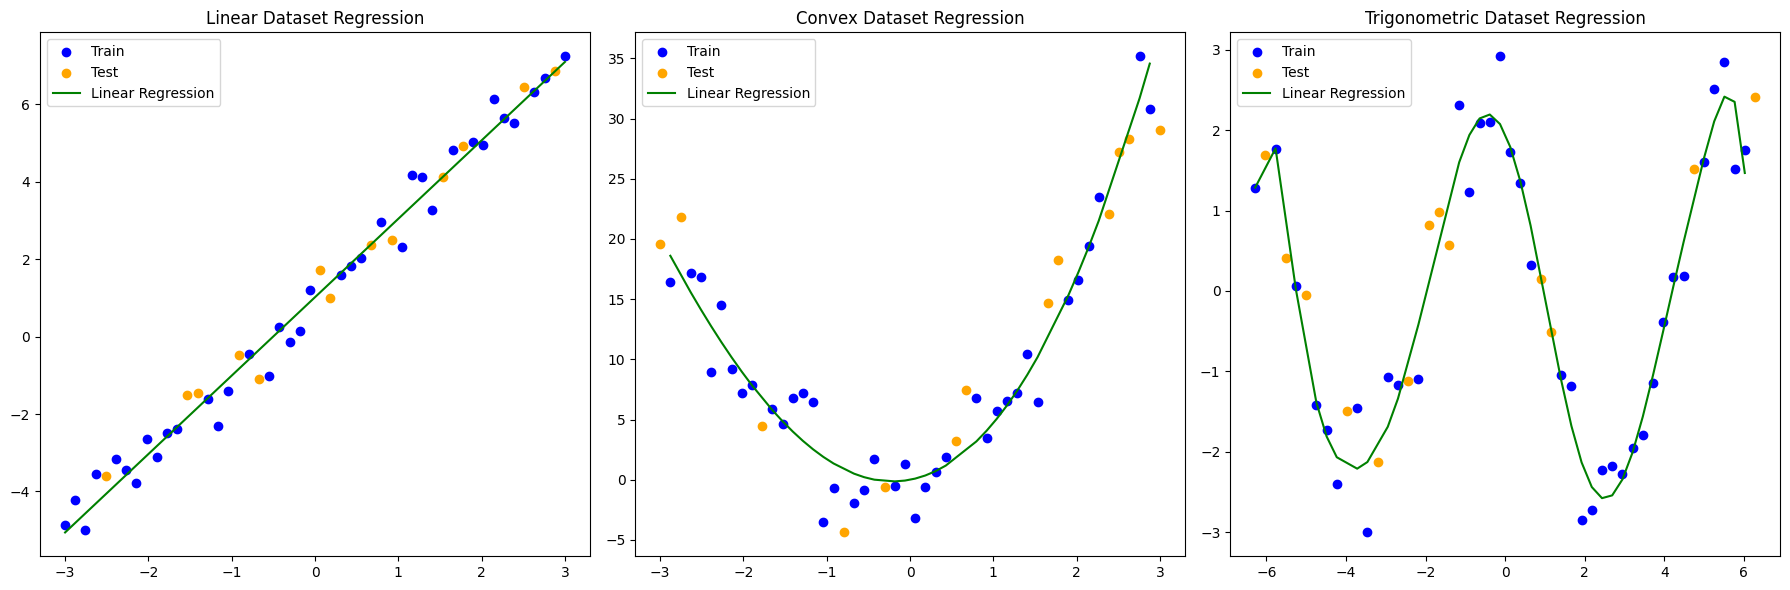

In [ ]:
# Plot the results along with the regression lines for each dataset
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Prepare sorted X values for plotting polynomial regression lines
X_linear_train_sorted_idx = np.argsort(X_linear_train.ravel())
X_convex_train_sorted_idx = np.argsort(X_convex_train.ravel())
X_tri_train_sorted_idx = np.argsort(X_tri_train.ravel())

# Linear dataset and model
axes[0].scatter(X_linear_train, Y_linear_train, color='blue', label='Train')
axes[0].scatter(X_linear_test, Y_linear_test, color='orange', label='Test')
axes[0].plot(X_linear_train[X_linear_train_sorted_idx], Y_linear_train_pred_poly[X_linear_train_sorted_idx], color='green', label='Linear Regression')
axes[0].set_title('Linear Dataset Regression')
axes[0].legend()

# Convex dataset and model
axes[1].scatter(X_convex_train, Y_convex_train, color='blue', label='Train')
axes[1].scatter(X_convex_test, Y_convex_test, color='orange', label='Test')
axes[1].plot(X_convex_train[X_convex_train_sorted_idx], Y_convex_train_pred_poly[X_convex_train_sorted_idx], color='green', label='Linear Regression')
axes[1].set_title('Convex Dataset Regression')
axes[1].legend()

# Trigonometric dataset and model
axes[2].scatter(X_tri_train, Y_tri_train, color='blue', label='Train')
axes[2].scatter(X_tri_test, Y_tri_test, color='orange', label='Test')
axes[2].plot(X_tri_train[X_tri_train_sorted_idx], Y_tri_train_pred_poly[X_tri_train_sorted_idx], color='green', label='Linear Regression')
axes[2].set_title('Trigonometric Dataset Regression')
axes[2].legend()

plt.tight_layout()
plt.show()

TASK: Next, you now have to calculate the Mean Squared Error (MSE) and R-squared ($R^2$) scores for both the training and test data for each polynomial regression model.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

#Calculate MSE and R^2 for the testing data for each polynomial model
mse_linear_test_poly = mean_squared_error(y_pred= Y_linear_test_pred_poly, y_true= Y_linear_test)
r2_linear_test_poly = r2_score(y_pred= Y_linear_test_pred_poly, y_true= Y_linear_test)

mse_convex_test_poly = mean_squared_error(y_pred= Y_convex_test_pred_poly, y_true= Y_convex_test)
r2_convex_test_poly = r2_score(y_pred= Y_convex_test_pred_poly, y_true= Y_convex_test)

mse_tri_test_poly = mean_squared_error(y_pred= Y_tri_test_pred_poly, y_true= Y_tri_test)
r2_tri_test_poly = r2_score(y_pred= Y_tri_test_pred_poly, y_true= Y_tri_test)



# Calculate MSE and R^2 for the training data for each polynomial model
mse_linear_train_poly = mean_squared_error(y_pred= Y_linear_train_pred_poly, y_true= Y_linear_train)
r2_linear_train_poly = r2_score(y_pred= Y_linear_train_pred_poly, y_true= Y_linear_train)

mse_convex_train_poly = mean_squared_error(y_pred= Y_convex_train_pred_poly, y_true= Y_convex_train)
r2_convex_train_poly = r2_score(y_pred= Y_convex_train_pred_poly, y_true= Y_convex_train)

mse_tri_train_poly = mean_squared_error(y_pred= Y_tri_train_pred_poly, y_true= Y_tri_train)
r2_tri_train_poly = r2_score(y_pred= Y_tri_train_pred_poly, y_true= Y_tri_train)

In [ ]:
# Print the MSE and R^2 values for both training and testing sets for each dataset with polynomial features
print("Linear Dataset with Polynomial Features:")
print(f"Train - MSE: {mse_linear_train_poly:.4f}, R^2: {r2_linear_train_poly:.4f}")
print(f"Test - MSE: {mse_linear_test_poly:.4f}, R^2: {r2_linear_test_poly:.4f}\n")

print("Convex Dataset with Polynomial Features:")
print(f"Train - MSE: {mse_convex_train_poly:.4f}, R^2: {r2_convex_train_poly:.4f}")
print(f"Test - MSE: {mse_convex_test_poly:.4f}, R^2: {r2_convex_test_poly:.4f}\n")

print("Trigonometric Dataset with Polynomial Features:")
print(f"Train - MSE: {mse_tri_train_poly:.4f}, R^2: {r2_tri_train_poly:.4f}")
print(f"Test - MSE: {mse_tri_test_poly:.4f}, R^2: {r2_tri_test_poly:.4f}\n")

Linear Dataset with Polynomial Features:
Train - MSE: 0.2063, R^2: 0.9850
Test - MSE: 0.1739, R^2: 0.9823

Convex Dataset with Polynomial Features:
Train - MSE: 5.4166, R^2: 0.9312
Test - MSE: 14.8664, R^2: 0.8775

Trigonometric Dataset with Polynomial Features:
Train - MSE: 0.1847, R^2: 0.9442
Test - MSE: 1.1270, R^2: 0.2889



##### 1.6. Discussion about the Evaluation Results.

TASK: Answer following questions:
- Does our model working well for each dataset? Explain based on the calculated metrics above.
- Let's play a little bit with degree_linear, degree_convex, degree_tri. Is is always beneficial to use higher-order degree features? What is the difference of underfitting and overfitting?

The models for this sections work very well for the linear and convex data but doesnt perform as well for the trig data. However, this model is much better than the last one for the trig data (and the convex data).

After playing with the polynomial degrees, it is clear that higher degree polynomials generally lead to overfitting. We can see that even without playing in the trig data set, it has a degree of 10 and performs very well in the training data set but does not generalize well in the test data.

##### 1.7. Ridge/Lasso Regression



> We've talked about overfitting/underfittingWe've in Machine Learning. One effective approach to address these issues is through the use of **regularization** methods or techniques.  These techniques introduce additional constraints or penalties to the optimization process, encouraging the development of simpler models that are less prone to overfitting. These constraints are usually applied to the model parameters during training, influencing their values to prevent them from becoming excessively large.

> Two common types of regularization used in regression are 'ridge' and 'lasso' regression. (technically, this involves adding an L1 or L2 term to the loss used for optimization... but this is a technicality).






Some interesting notes on the material...

- Interesting Material : https://medium.com/@tavishi.1402/regularization-techniques-lasso-and-ridge-90d3cc73ca4c

- https://medium.com/@nerdjock/lesson-18-machine-learning-regularization-techniques-l1-lasso-and-l2-ridge-regularization-b9dc312c71fe

- https://www.linkedin.com/pulse/regularization-l1lasso-l2ridge-mukesh-manral/?trk=pulse-article


- Lasso regression is interesting because it theoretically can perform linear regression in **feature space**. I.e. it theoretically can learn how to *linearly* separate transformations of the data that maximize the information gain from the raw data.


TASK: Your task is to implement both Ridge and Lasso regression and compare their performances. Determine, do they perform the same? If one is better than the other one, why do you think so..? **Back up your answers!!**



Additionally, implement **ElasticNet**, which combines elements of both Ridge and Lasso regression.

**All these modules can be found in sklearn.linear_model**


In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score


# Define a high degree for polynomial features for the trigonometric dataset
degree = 20

# Regularization strength for Ridge, Lasso, and ElasticNet
alpha_value = 0.01


#define model_default, model_lasso, model_ridge, model_elastic
model_default = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_lasso = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha_value))
model_ridge = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha_value))
model_elastic = make_pipeline(PolynomialFeatures(degree), ElasticNet(alpha=alpha_value))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.442e+00, tolerance: 1.224e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.98015e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.234e+00, tolerance: 1.224e-02
  model = cd_fast.enet_coordinate_descent(


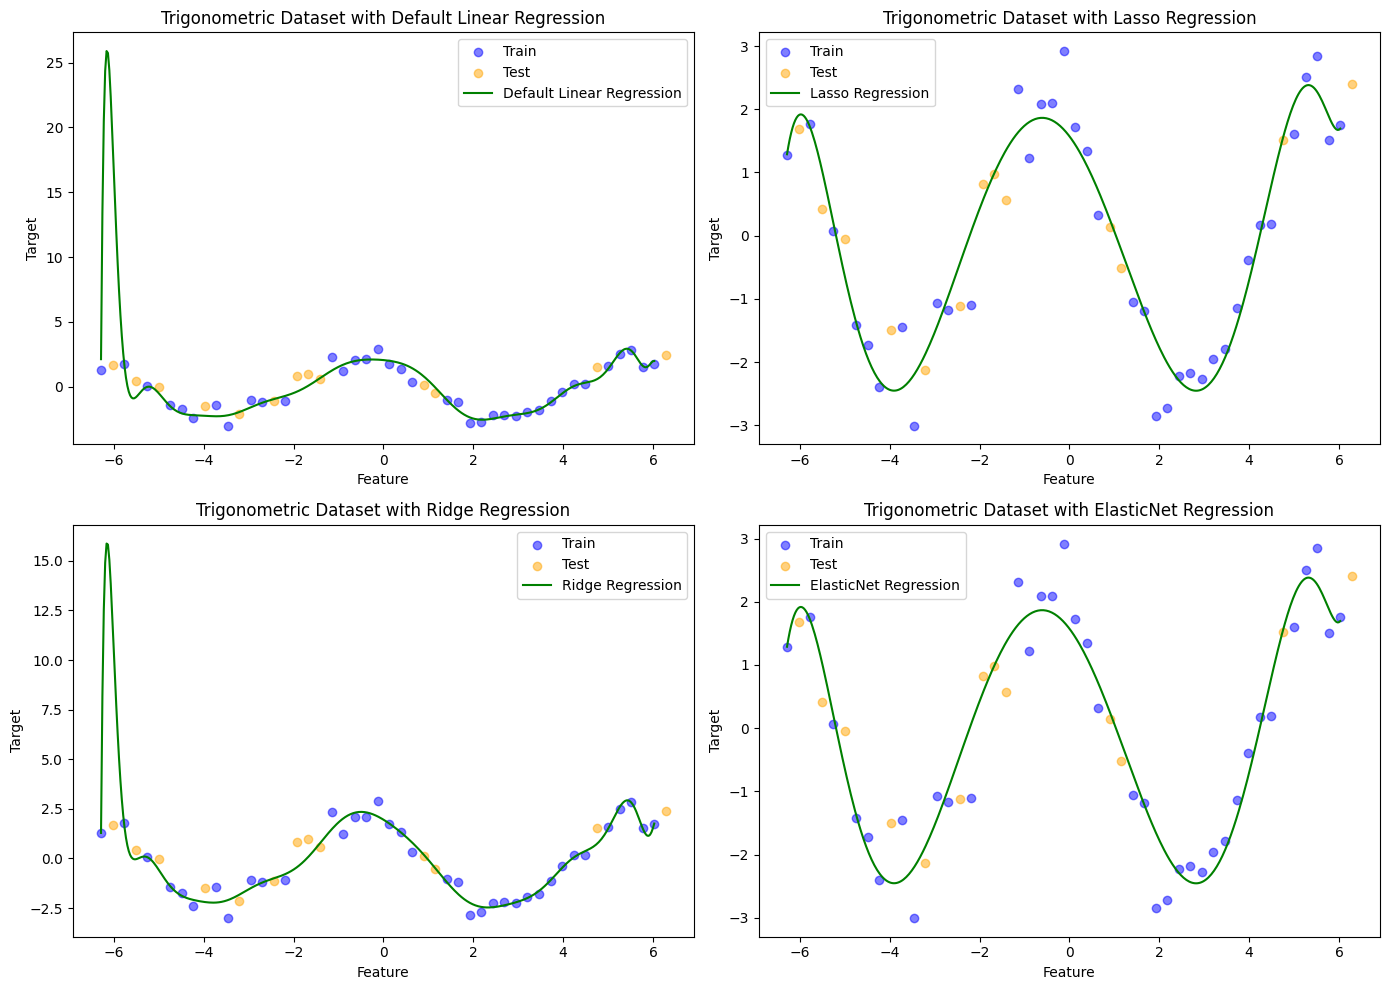

In [ ]:
# Fit the models to the trigonometric training data
model_default.fit(X_tri_train, Y_tri_train)
model_lasso.fit(X_tri_train, Y_tri_train)
model_ridge.fit(X_tri_train, Y_tri_train)
model_elastic.fit(X_tri_train, Y_tri_train)

# Generate a dense grid for plotting
X_tri_dense = np.linspace(X_tri_train.min(), X_tri_train.max(), 400).reshape(-1, 1)

# Predict on the dense grid for smooth plotting
Y_tri_dense_pred_default = model_default.predict(X_tri_dense)
Y_tri_dense_pred_lasso = model_lasso.predict(X_tri_dense)
Y_tri_dense_pred_ridge = model_ridge.predict(X_tri_dense)
Y_tri_dense_pred_elastic = model_elastic.predict(X_tri_dense)

# Plot the results along with the regression lines for the trigonometric dataset
plt.figure(figsize=(14, 10))

# Default Linear Regression
plt.subplot(2, 2, 1)
plt.scatter(X_tri_train, Y_tri_train, color='blue', label='Train', alpha=0.5)
plt.scatter(X_tri_test, Y_tri_test, color='orange', label='Test', alpha=0.5)
plt.plot(X_tri_dense, Y_tri_dense_pred_default, color='green', label='Default Linear Regression')
plt.title('Trigonometric Dataset with Default Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Lasso Regression
plt.subplot(2, 2, 2)
plt.scatter(X_tri_train, Y_tri_train, color='blue', label='Train', alpha=0.5)
plt.scatter(X_tri_test, Y_tri_test, color='orange', label='Test', alpha=0.5)
plt.plot(X_tri_dense, Y_tri_dense_pred_lasso, color='green', label='Lasso Regression')
plt.title('Trigonometric Dataset with Lasso Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Ridge Regression
plt.subplot(2, 2, 3)
plt.scatter(X_tri_train, Y_tri_train, color='blue', label='Train', alpha=0.5)
plt.scatter(X_tri_test, Y_tri_test, color='orange', label='Test', alpha=0.5)
plt.plot(X_tri_dense, Y_tri_dense_pred_ridge, color='green', label='Ridge Regression')
plt.title('Trigonometric Dataset with Ridge Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# ElasticNet Regression
plt.subplot(2, 2, 4)
plt.scatter(X_tri_train, Y_tri_train, color='blue', label='Train', alpha=0.5)
plt.scatter(X_tri_test, Y_tri_test, color='orange', label='Test', alpha=0.5)
plt.plot(X_tri_dense, Y_tri_dense_pred_elastic, color='green', label='ElasticNet Regression')
plt.title('Trigonometric Dataset with ElasticNet Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()

ANSWER TO WHICH REGULARIZATION TECHNIQUE WORKED BEST:

Lasso and ElasticNet seem to be the best options here.

it seems that Lasso out preformed ridge by a large margin, mostly due to the lack of a huge spike towards the beginning. It seems that ElasticNet performed better because it utilizes Lasso.

### Section 2: Linear Regression Model Design

The mean-squared error loss is one of the basic loss that can be used for linear regression.

$$L_\text{MSE} = \frac{1}{n}\sum_{i=1}^n(\hat{Y}_i - Y_i)^2$$
$$\hat{Y}_i = \theta_1 X_i + \theta_2$$

Reminder: $\frac{\partial f}{\partial x}$ means taking the derivative of $f$ with respect to $x$, assuming ALL other variables are constants.

Sources:

https://tutorial.math.lamar.edu/classes/calciii/partialderivatives.aspx

https://tutorial.math.lamar.edu/classes/calci/DerivativeIntro.aspx



##### 2.1. Derive the gradients $\frac{\partial L}{\partial\theta_1}, \frac{\partial L}{\partial\theta_2}$.




to make the equation easier:
m = theta1
b = theta2

df/dm = 1/n * Summation of (2x [xm -y +b])

df/db = 1/n * Summation of (2[b - y + mx])

##### 2.2 Implement our SimpleLinearRegression class





TASK: Your task is to complete the implementation of a Simple Linear Regression model using gradient descent from scratch.

You may have to follow these steps: <br>

* Initialize model parameters.
* Implement gradient descent to iteratively update the model parameters.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        #Initialize m and b
        self.m = 0.0 
        self.b = 0.0


    def fit(self, X, Y):
        #Perform gradient descent
        for _ in range(self.iterations):
            totalM = 0.0
            totalB = 0.0

            #compute gradients
            for xi, yi in zip(X, Y):
              totalM += 2*xi*(xi*self.m -yi + self.b)
              totalB += 2*(self.b -yi + self.m*xi)

            #take step away from gradient according to step size
            self.m -= self.learning_rate * (totalM/X.shape[0])
            self.b -= self.learning_rate * totalB/X.shape[0]



    def predict(self, X):
        return self.m*X + self.b

    def plot_regression_line(self, X, Y):
        # Predict values
        Y_pred = self.predict(X)

        # Plotting the regression line and the data points
        # Plot your predictions on X.
        plt.scatter(X, Y, color='blue', label='Actual data')
        plt.plot(X, Y_pred, color='red', label='Fitted line')
        plt.title('Linear Regression Using Gradient Descent')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()

The following code will test your implementation.

In [ ]:
def test_linear_regression(model, X, Y):
    model.fit(X, Y)
    predictions = model.predict(X)
    print(predictions)
    print(Y)

    relative_error = np.mean(np.abs((Y - predictions) / (Y + 1e-8)))
    return relative_error < 0.02

test_datasets = [
    (np.array([1, 2, 3, 4, 5]), np.array([2, 4, 6, 8, 10])),
    (np.array([1, 2, 3, 4, 5]), np.array([1, 4, 9, 16, 25])),
    (np.array([0, 0, 1, 1]), np.array([0, 1, 1, 0]))
]

# Initialize the model
model = SimpleLinearRegression(learning_rate=0.001, iterations=5000)


# Test each dataset
results = [test_linear_regression(model, X, Y) for X,Y in test_datasets]
answers = [True, False, False]
if results == answers:
  print("Good job!")
else:
  print("Wrong Implmentation! Your linear regression model needs more testing!")
  assert(False)

[2.06858656 4.04231138 6.0160362  7.98976102 9.96348584]
[ 2  4  6  8 10]
[1.64862717e-02 5.62707527e+00 1.12376643e+01 1.68482533e+01
 2.24588423e+01]
[ 1  4  9 16 25]
[-0.12085798 -0.12085798  0.88370271  0.88370271]
[0 1 1 0]
Good job!


##### 2.3 Train your model
TASK:
- Train your *SimpleLinearRegression* model
- Visualize the data (*You can use "plot_regression_line"*)

The following code will visualize your regression results. Use the model to **predict the scores for studying 1.5 hours and 3.5 hours**.

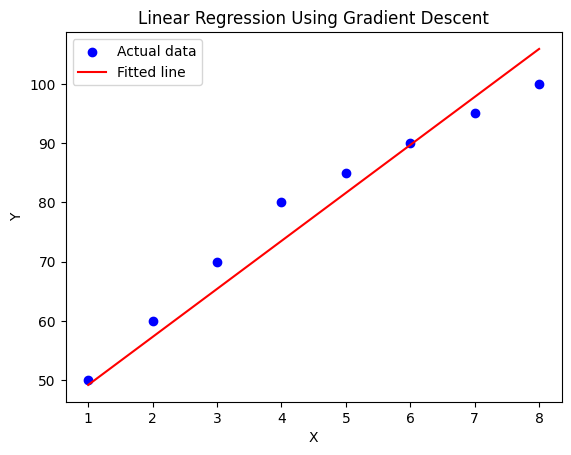

In [ ]:
# Given dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8])  # Hours Studied
Y = np.array([50, 60, 70, 80, 85, 90, 95, 100])  # Test Score

X_test = np.array([1.5, 3.5])


#Create model
model = SimpleLinearRegression(learning_rate=0.001, iterations=5000)

#train model
model.fit(X, Y)

#plot results
model.plot_regression_line(X, Y)

# Section 3 : Can Regression do Classification?
Starting at the beginning, linear models are the simplest type of model possible. They imply that our data, when graphed in a mathematical basis, can be separated by a curve that is a line (in 2 dimensions), a plane (in 3 dimensions), or a hyperplane (> 3 dimensions).


What about using what we've done for classification? Can we apply our newfound regression skills to classify things? Let's try! You already have a lot of knowledge about classification, so some of the basics from the last assignment will not be repeated.

Consider the following plot

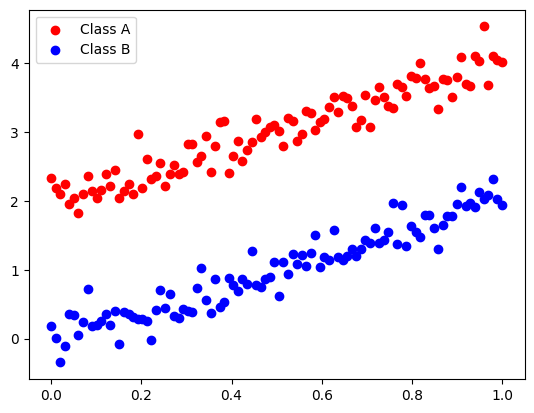

In [ ]:
x_axis = np.linspace(0, 1, 100)
class_a = 2 * x_axis + 1 + np.random.normal(1, 0.2, x_axis.shape[0])
class_b = 2 * x_axis + 1 + np.random.normal(-1, 0.2, x_axis.shape[0])

plt.scatter(x_axis, class_a, color='r', label='Class A')
plt.scatter(x_axis, class_b, color='b', label='Class B')
plt.legend()

There is a very evident line that separates our classes here, one that we humans could easily draw by hand. Let's see if we can get a computer to find this for us!

### Question 1: GD Linear Classifier

We wish to create a function of the form

$$ g(x) = mx + b$$

where $m$ is the slope of a line, $b$ is a bias term, and $x$ is the function variable. But! More specifically, we want our output $f$ to be a 'class'... a binary choice (in the case of 2 classes). So instead we will define..

$$ f(x) = 1 \space\text{if}\space y > g(x) \space \text{else} \space 0$$

where a 1 represents class 'A', and 0 represents class 'B'.

So, we parameterize the curve like so...

$$ g(x) = \theta_1 x + \theta_2 $$

meaning I can define

$$g(x;\theta) = \theta_1 x + \theta_2$$

and $g$ in a similar fashion.

In theory, there exists at least one (we can draw it) line $g^* (x;\theta^*)$ that perfectly separates the data. The $^*$ represents 'optimal'.

The mathematically curious among you may choose to verify that there is a way to calculate the EXACTLY correct answer here, but for now we will choose to use an optimization technique to hone in on the correct values for $\theta_1, \theta_2$.

The optimization we will choose to use is standard gradient descent, where using the chain rule we can find the direction in which to optimize $\vec{\theta}$ such that we approach an optimal solution.

This means we will **start** by effectively training a linear regression model and using for classification. Just as a sneak peak ahead, what do you think might go wrong? (no need to answer, just think about it)

This is your data to use below.

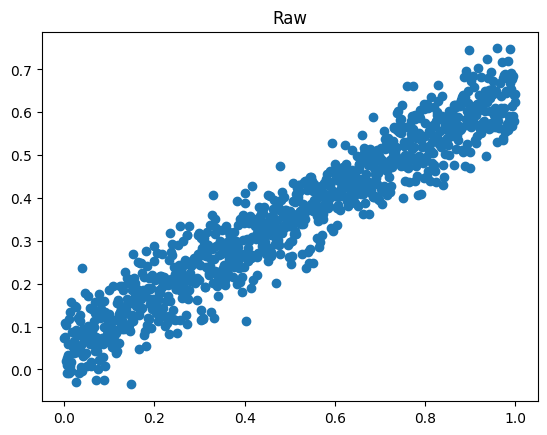

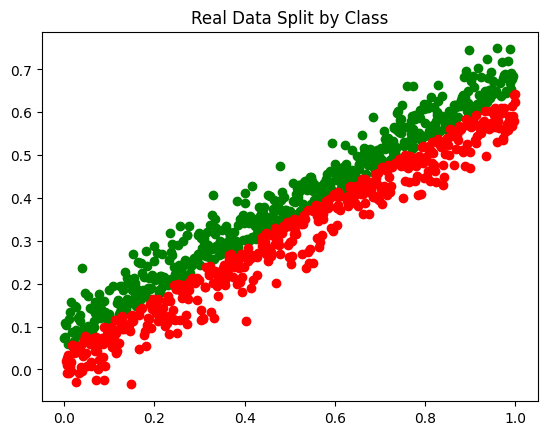

In [ ]:
m_star = 0.6
b_star = 0.05

x_data_full = np.linspace(0, 1, 1000)
y_data_full = m_star * x_data_full + b_star + np.random.normal(0, 0.05,
                                                          x_data_full.shape[0])
plt.scatter(x_data_full, y_data_full)
plt.title("Raw")
plt.show()

def calc(theta, x_data):
  return theta[0] * x_data + theta[1]

calced_values = calc([m_star, b_star], x_data_full)
true_x_a = []
true_x_b = []
true_y_a = []
true_y_b = []
for i in range(x_data_full.shape[0]):
  val = y_data_full[i]
  if val > calced_values[i]:
    true_x_a.append(x_data_full[i])
    true_y_a.append(y_data_full[i])
  else:
    true_x_b.append(x_data_full[i])
    true_y_b.append(y_data_full[i])

plt.scatter(true_x_a, true_y_a, color='g')
plt.scatter(true_x_b, true_y_b, color='r')
plt.title("Real Data Split by Class")
plt.show()

#### Part 1

TASK: Create a numpy vector for theta, randomize it below.** You may choose any method of randomly generating it you like **besides hardcoding the values!!**

In [ ]:
import random
theta = [np.random.uniform(-1,1), np.random.random()]
theta

[-0.27411145630801603, 0.995480490704257]

#### Part 2

TASK: **Plot the line** created by your theta and **color everything **that is classified correctly green, and everything incorrectly red.**

**Assume that everything above the line is class A, everything below is class B**

**HINT: It may be useful to create a function for this task in the future. Given a theta, and the dataset, highlight correct values.**

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

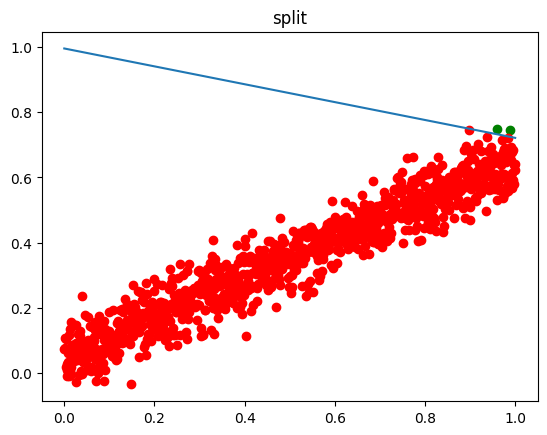

In [ ]:
def calc(el, x_data):
  return el[0] * x_data + el[1]

def separate(x_data, y_data, el):
  calced_values = calc(el, x_data)

  true_x_a = []
  true_x_b = []
  true_y_a = []
  true_y_b = []
  for i in range(x_data.shape[0]):
    val = y_data[i]
    if val > calced_values[i]:
      true_x_a.append(x_data[i])
      true_y_a.append(y_data[i])
    else:
      true_x_b.append(x_data[i])
      true_y_b.append(y_data[i])

  return (true_x_a, true_y_a), (true_x_b, true_y_b)

def plotLine(el, x_data, y_data):

  calced_values = calc(el, x_data)

  true_x_a = []
  true_x_b = []
  true_y_a = []
  true_y_b = []
  for i in range(x_data.shape[0]):
    val = y_data[i]
    if val > calced_values[i]:
      true_x_a.append(x_data[i])
      true_y_a.append(y_data[i])
    else:
      true_x_b.append(x_data[i])
      true_y_b.append(y_data[i])

  plt.scatter(true_x_a, true_y_a, color='g')
  plt.scatter(true_x_b, true_y_b, color='r')
  plt.title("split")


  lineX = np.linspace(0, 1, 100)
  lineY = theta[0] * lineX + theta[1]

  print(lineX)
  print(lineY)

  plt.plot(lineX, lineY, )

  plt.show()

plotLine(theta, x_data_full, y_data_full)

Way off!! Let's do some regression work now and get into the nitty gritty. This is just like what you did before.

#### Part 3: Write a function for the loss

TASK: Define your loss function as the MSE loss.

In [ ]:
def mse_loss(true_values, predictions):
  total = 0
  for true, pred in zip(true_values, predictions):
    total += (true - pred)**2
  return total

#### Part 4: Training Loop 

TASK: Now write the training loop...

1. Start with your initialized theta.
2. Fix the learning rate (we've fixed it for you)
3. Define the number of steps to run (we've fixed that too!)
4. For each step, perform a training step. Print the loss, **if you'd like**. **Do print the final loss**. **You have a simple linear regression model from earlier**
5. After the last step, graph your line and classify the points. If they're above your line, it's class A. If they're below, class B.
6. Graph your line, and the two classes as you drew them.
7. Compare your output to the real line that separates the classes. How far off were you? How many points did you miss?


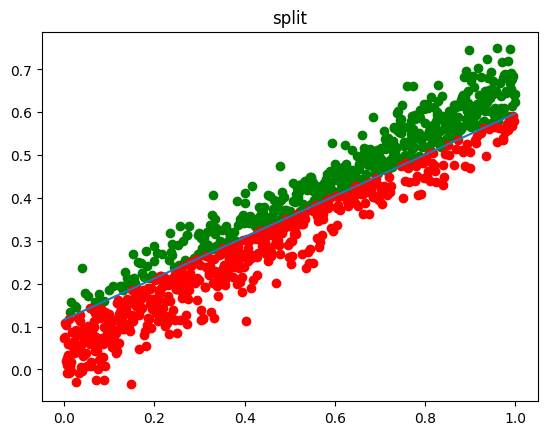

In [ ]:
lr = 0.01 #learning rate
num_steps = 1000 

#create the model
model = SimpleLinearRegression(lr, num_steps)
model.fit(x_data_full, y_data_full)

#perform regression
calced_values = model.predict(x_data_full)

true_x_a = []
true_x_b = []
true_y_a = []
true_y_b = []
for i in range(x_data_full.shape[0]):
  val = y_data_full[i]
  if val > calced_values[i]:
    true_x_a.append(x_data_full[i])
    true_y_a.append(y_data_full[i])
  else:
    true_x_b.append(x_data_full[i])
    true_y_b.append(y_data_full[i])

plt.scatter(true_x_a, true_y_a, color='g')
plt.scatter(true_x_b, true_y_b, color='r')
plt.title("split")


plt.plot(x_data_full, calced_values)

plt.show()


#### Part 5: What went wrong? 
**In the textbox below, explain why you think this method of training the linear classifier from above Part 4 failed. Shouldn't it have worked? What lessons should you take away from this for doing machine learning in data science?**




It seems that the training did push the line in the correct direction (ie the training reduced the MSE). However, it did not get the best line for some reason. This can be due to multiple factors but one factor that seems to point out to me is the number of iterations and the learning rate. Increasing these seems to provide a better classification line. This makes sense because more iterations gives the algorithm more time to converge and a higher learning rate causes it to converge quicker (assuming it doesn't skip past optimality and begin to thrash). Hence, this resolves the main issue at play here which is that the model did not have enough time/compute to converge to the optimal value.

### Handling More complicated data?

Excellent! We can classify data using a linear plane, and it's merely a mathematical exercise to extend this concept to higher dimensions.I.e. all the partials you computed earlier, now you just end up with more partial derivatives.

You have partial derivatives with each of the dimensions as you have a linear component in each of the dimensions.

Technically you also have 'y-intercepts' for each of the dimensions as well, but they can be combined into one constant term. This gives you $d+1$ weights to tune, where $d$ is the dimensionality of the X data.

But... what about this?

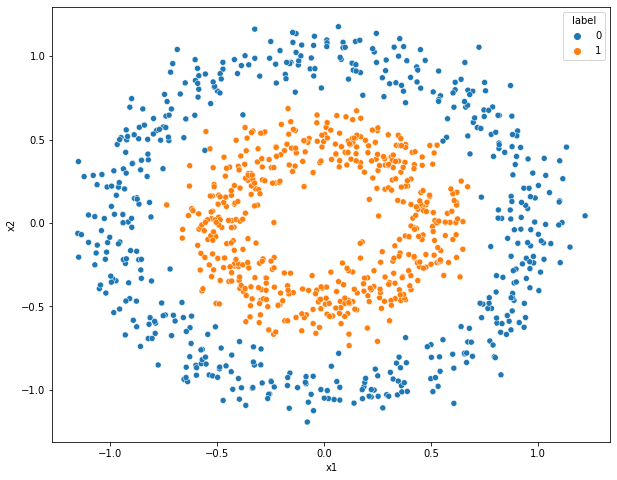

No good solution now...

What about this instead?

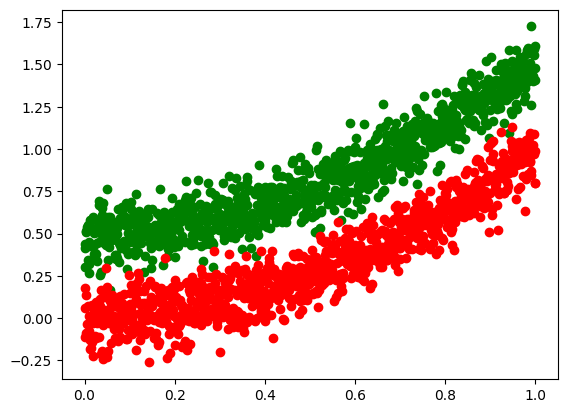

In [ ]:
y_data_full = x_data_full ** 2

class_a = x_data_full ** 2 + np.random.normal(0.5, 0.1, x_data_full.shape[0])
class_b = x_data_full ** 2 + np.random.normal(0, 0.1, x_data_full.shape[0])

plt.scatter(x_data_full, class_a, color='g')
plt.scatter(x_data_full, class_b, color='r')

No good. We can't separate data that looks like that. Not linearly anyway.

BUT! What if we redefine our basis? Instead of our y direction being linear in x, what if it was $x^2$?

Text(0.5, 0, 'x squared')

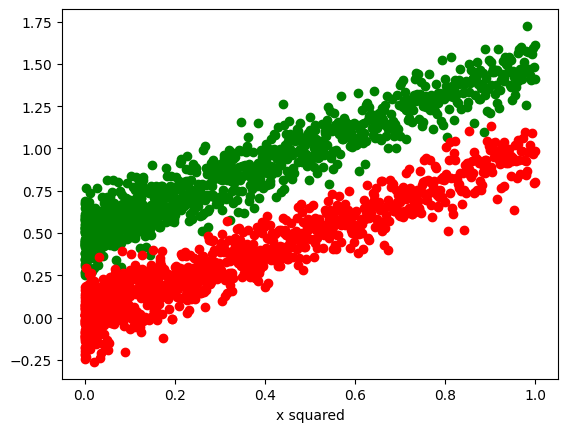

In [ ]:
x_squared = x_data_full ** 2

plt.scatter(x_squared, class_a, color='g')
plt.scatter(x_squared, class_b, color='r')

plt.xlabel('x squared')

Hey look! It's linear! What does this mean? By casting into higher dimensional spaces through a **kernel function**, we can linearly separate our data.

Of course we chose a very simple kernel.

But for more complex data there are a variety of kernels. Go look some up! **'Kernel trick SVM'** should give you plenty of great resources.




#### Part 6: List some different kernels you found online, their names.


Linear Kernel, RBF kernel (Radial Bias Function), Polynomial kernel, sigmoid kernel

#### Now, our final point is that **figuring out the kernel to use** is incredibly difficult, and effectively maps our data from raw $(x, y)$ space to some feature space $(\phi(x), \phi(y))$ as fixed by our kernel function.

To **learn** this feature space, instead of guess and check with kernel methods, we invented **neural networks**... and many other methods that perform **representation learning**. **THIS** is the power of neural networks.

### Final Section: Neural Networks

In the final test, and meat of the assignment, we want you to perform a real world regression all on your own. You know the fundamental underlying ideas, so let's use some real world libraries and methods to actually do regression on a **real** dataset.

We'll be using pytorch for this next section. Look at (https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/070179efc13bd796c5dd4af7bf52d5b9/intro.ipynb) for a run down on pytorch basics.

1. Import pytorch and sklearn, and use them to download the https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset
2. Prepare a train and test dataset from the data. ONLY USE the TRAIN dataset for training!! Note that sklearn should do this for you.
3. Build a model in pytorch. Use the tutorials to help you.
4. Build the training loop! Train your network and share your results with us. Plot your loss curve over time.
5. Marvel at the multi-dimensional representation learning power of neural networks ! : )

You are free to use whatever hyperparameters or optimizer you prefer... though 'Adam' may be more powerful than the gradient descent you learned about in class.

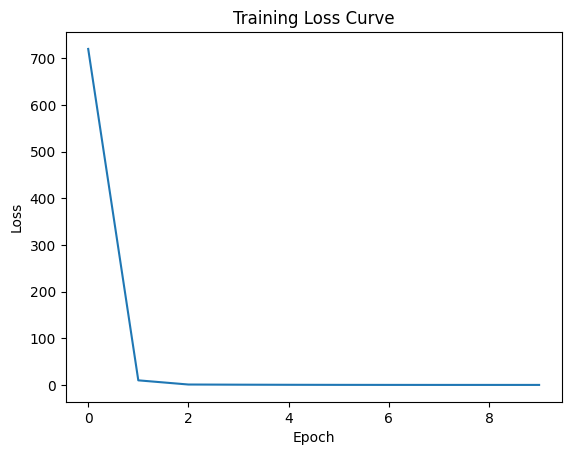

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim

# Load the data
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.fc(x)
 
model = RegressionModel(input_size=X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, criterion, optimizer, X_train, y_train, epochs=10, batch_size=32):
    model.train()
    losses = []

    for epoch in range(epochs):
        epoch_loss = 0.0
        for i in range(0, len(X_train), batch_size):
            inputs = torch.FloatTensor(X_train[i:i+batch_size])
            targets = torch.FloatTensor(y_train[i:i+batch_size]).unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item() * len(inputs)

        epoch_loss /= len(X_train)
        losses.append(epoch_loss)

    return losses


losses = train_model(model, criterion, optimizer, X_train, y_train, epochs=10, batch_size=32)

import matplotlib.pyplot as plt

plt.plot(losses)
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()